In [5]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

image_data = nib.load('../images/FLAIR.nii.gz').get_fdata()

In [6]:
image_data.shape[0]

240

In [7]:
def median_filter(image_data):
    filtered_image = np.zeros_like(image_data)

    for x in range(1, image_data.shape[0]-1):
        for y in range(1, image_data.shape[1]-1):
            for z in range(1, image_data.shape[2]-1):
                # Extraer la vecindad 3x3x3
                neighborhood = image_data[x-1:x+2, y-1:y+2, z-1:z+2]

                new_neighborhood = np.sort(neighborhood)
                
                # Calcular la mediana de la vecindad
                median_value = np.median(new_neighborhood)
                
                # Asignar el valor mediano al píxel filtrado
                filtered_image[x, y, z] = median_value

    return filtered_image

In [8]:
res = median_filter(image_data)

In [ ]:
def kmeans_segmentation(image, k, tol, max_iter):
    # Inicializamos los centroides con valores entre el mínimo y el máximo valor de la imagen
    centroids = np.linspace(np.min(image), np.max(image), k)

    for i in range(max_iter):
        # Calculamos la distancia entre los valores de la imagen y los centroides
        distances = np.abs(image - centroids[..., None, None, None])

        # Asignamos cada pixel a su centroide más cercano
        segmentation = np.argmin(distances, axis=0)

        # Calculamos los nuevos centroides como la media de los valores asignados a cada cluster
        new_centroids = np.array([np.mean(image[segmentation == j]) for j in range(k)])

        # Comprobamos si la diferencia entre los nuevos y los antiguos centroides es menor que la tolerancia
        if np.all(np.abs(new_centroids - centroids) < tol):
            break

        # Asignamos los nuevos centroides
        centroids = new_centroids

    return segmentation

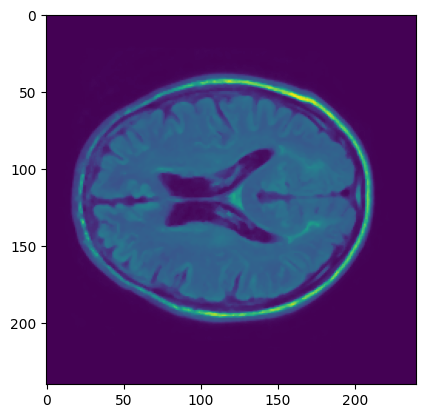

In [11]:
plt.imshow(res[:,:,24])
# plt.hist(image_data_rescaled[image_data_rescaled>0.01].flatten(),100)